# First Assignment

This assignment was resolved using Google Colab Jupyter Notebooks. This is the [link](https://colab.research.google.com/drive/1ssHxA8Yz6f-yL5KkjdjjEUX7w2l0i_GA?usp=sharing) to the online resolution.
Students:
- Alan García Justel
- Arántzazu López-Larraínzar Salazar

In [1]:
!pip install pulp pyomo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.2 MB/s eta 0:00:00


## Part 1 - Exercise 58


The exercise deals with the choice among different aircraft types to be used for the transport of tons of cargo to two different cities, A and B, to optimise and minimise the cost of these journeys.

The information given about the aircrafts is the following:
- There are 8 aircrafts of type 1 and each one of them can carry 45 tons of cargo.
- 15 aircrafts of type 2, that can carry 7 tons.
- 11 aircrafts of type 3, that can carry 5 tons.

Each plane can only make at most one flight per day, and 20 tons of cargo must to be flown to city A and 28 tons to city B.

Additionally, the cost of flying a plane from the terminal to each city is specified in the next table.

<table style="width:100%; border-collapse: collapse;">
    <!-- Primera fila: Título general de la tabla -->
    <tr>
        <th colspan="6" style="text-align: center; padding: 8px; border-bottom: 2px solid black;">
            Cost of flying the planes to each city
        </th>
    </tr>
    <!-- Fila de encabezados -->
    <tr>
        <th style="text-align: left; padding: 8px;">City\Aircraft</th>
        <th style="text-align: center; padding: 8px;">Type 1</th>
        <th style="text-align: center; padding: 8px;">Type 2</th>
        <th style="text-align: center; padding: 8px;">Type 3</th>
    </tr>
    <!-- Filas de datos -->
    <tr>
        <td style="text-align: left; padding: 8px;">City A</td>
        <td style="text-align: center; padding: 8px;">23</td>
        <td style="text-align: center; padding: 8px;">15</td>
        <td style="text-align: center; padding: 8px;">1.4</td>
    </tr>
    <tr>
        <td style="text-align: left; padding: 8px;">City B</td>
        <td style="text-align: center; padding: 8px;">58</td>
        <td style="text-align: center; padding: 8px;">20</td>
        <td style="text-align: center; padding: 8px;">3.8</td>
    </tr>
</table>

Now, we can define the optimization variables and the objective function:

$x_i$: *'Number of aircrafts of type i that are going to fly to city A'*

$y_i$: *'Number of aircrafts of type i that are going to fly to city B'*

$\min z = \sum{cost\_of\_flying * X_i} + \sum{cost\_of\_flying * Y_i} $

We have considered the restrictions on the number of aircrafts and the amount of tons each city needs to build the constraints.

Finally, the formulation obtained is as follows:

\begin{eqnarray*}
\min \ z=23x_1+15x_2+1.4x_3+58y_1+20y_2+3.8y_3 \\
\mbox{subject to}\hspace{1.8cm}\\
x_1+y_1 \leq 8  \\
x_2+y_2 \leq 15 \\
x_3+y_3 \leq 11 \\
45x_1+7x_2+5x_3 \geq 20  \\
45y_1+7y_2+5y_3 \geq 28  \\
x_{i},y_{i} \geq 0; x_i, y_i \in 	\mathbb{N} \quad \forall i \in \{1, 2, 3\}\\
\end{eqnarray*}

Note that the restrictions $45x_1+7x_2+5x_3 \geq 20$ and $45y_1+7y_2+5y_3 \geq 28$ do not comply exactly with what is specified in the exercise. The exercise says that city A must receive 20 tonnes of cargo and city B, 28 tonnes. However, turning these constraints into equal restrictions would not have taken into account the possibility of using an aircraft that was not full. For example, if a type 1 aircraft is used to deliver cargo to city A, it would carry the 20 tonnes needed instead of the 45 tonnes.

In [2]:
import pulp
model_problem_47 = pulp.LpProblem("Exercise 47", pulp.LpMinimize)

# Variables x1,x2, x3 are the number of planes that are sent to the city A. They are integer and positive or zero.
X1 = pulp.LpVariable('X1', lowBound=0, cat='Integer')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Integer')
X3 = pulp.LpVariable('X3', lowBound=0, cat='Integer')

# Variables y1,y2, y3 are the number of planes that are sent to the city B. They are integer and positive or zero.
Y1 = pulp.LpVariable('Y1', lowBound=0, cat='Integer')
Y2 = pulp.LpVariable('Y2', lowBound=0, cat='Integer')
Y3 = pulp.LpVariable('Y3', lowBound=0, cat='Integer')

# Objective function
model_problem_47 += 23*X1 + 15*X2 + 1.4*X3 + 58*Y1 + 20*Y2 + 3.8*Y3, "z"

# Constraints
# (restrictions in the number of planes)
model_problem_47 += X1 + Y1 <= 8
model_problem_47 += X2 + Y2 <= 15
model_problem_47 += X3 + Y3 <= 11

# (restrictions in the number of tons carried out to each city)
model_problem_47 += 45*X1 + 7*X2 + 5*X3 >= 20
model_problem_47 += 45*Y1 + 7*Y2 + 5*Y3 >= 28

# Visualization of the model
model_problem_47

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Exercise_47:
MINIMIZE
23*X1 + 15*X2 + 1.4*X3 + 58*Y1 + 20*Y2 + 3.8*Y3 + 0.0
SUBJECT TO
_C1: X1 + Y1 <= 8

_C2: X2 + Y2 <= 15

_C3: X3 + Y3 <= 11

_C4: 45 X1 + 7 X2 + 5 X3 >= 20

_C5: 45 Y1 + 7 Y2 + 5 Y3 >= 28

VARIABLES
0 <= X1 Integer
0 <= X2 Integer
0 <= X3 Integer
0 <= Y1 Integer
0 <= Y2 Integer
0 <= Y3 Integer

In [ ]:
# Solving the optimization model
model_problem_47.solve()

# Status of the solver
print("The status of the solution found is: ", pulp.LpStatus[model_problem_47.status])

# Optimal values for each variable
print("The optimal values for the variables are: ")
for variable in model_problem_47.variables():
    print ("{} = {}".format(variable.name, variable.varValue))

# Best solution
print("Optimal value: ",pulp.value(model_problem_47.objective))

The status of the solution found is:  Optimal
The optimal values for the variables are: 
X1 = 0.0
X2 = 0.0
X3 = 4.0
Y1 = 0.0
Y2 = 0.0
Y3 = 6.0
Optimal value:  28.4


After solving the model, we have obtained the following results:
* **4 aircraft of type 3** to bring the tonnes to **city A**
* **6  aircraft of type 3** to **city B** (one of the planes will not be full, it will only be loaded with 3 tons, instead of 5)

So the optimal result of this model, minimising the cost of the journeys, is **28.4**.

## Part 2 - Exercise 2.7

In this exercise, we address an optimization problem aimed at maximizing the monthly production of two types of parts, Type A and Type B. To produce each part, five processes—L, S, D, M, and G—must be completed, each with defined production times for each part type as is shown in the next table:



<table style="width:100%; border-collapse: collapse;">
    <!-- Primera fila: Título general de la tabla -->
    <tr>
        <th colspan="6" style="text-align: center; padding: 8px; border-bottom: 2px solid black;">
            Time per Process (in hours)
        </th>
    </tr>
    <!-- Fila de encabezados -->
    <tr>
        <th style="text-align: left; padding: 8px;">Part</th>
        <th style="text-align: center; padding: 8px;">L</th>
        <th style="text-align: center; padding: 8px;">S</th>
        <th style="text-align: center; padding: 8px;">D</th>
        <th style="text-align: center; padding: 8px;">M</th>
        <th style="text-align: center; padding: 8px;">G</th>
    </tr>
    <!-- Filas de datos -->
    <tr>
        <td style="text-align: left; padding: 8px;">A</td>
        <td style="text-align: center; padding: 8px;">0.6</td>
        <td style="text-align: center; padding: 8px;">0.4</td>
        <td style="text-align: center; padding: 8px;">0.1</td>
        <td style="text-align: center; padding: 8px;">0.5</td>
        <td style="text-align: center; padding: 8px;">0.2</td>
    </tr>
    <tr>
        <td style="text-align: left; padding: 8px;">B</td>
        <td style="text-align: center; padding: 8px;">0.9</td>
        <td style="text-align: center; padding: 8px;">0.1</td>
        <td style="text-align: center; padding: 8px;">0.2</td>
        <td style="text-align: center; padding: 8px;">0.3</td>
        <td style="text-align: center; padding: 8px;">0.3</td>
    </tr>
    <tr>
        <td style="text-align: left; padding: 8px;">Availability</td>
        <td style="text-align: center; padding: 8px;">10</td>
        <td style="text-align: center; padding: 8px;">3</td>
        <td style="text-align: center; padding: 8px;">4</td>
        <td style="text-align: center; padding: 8px;">6</td>
        <td style="text-align: center; padding: 8px;">5</td>
    </tr>
</table>

Additionally, each process has a specific availability, as there are different numbers of machines capable of performing each process in parallel. Knowing the processing times and availability listed in the previous table, along with the fact that the daily available hours are 8 hours for 30 days a month, we can define the optimization variables and the objective function as follows:

$x_A$: *'Number of type A parts to be produced in a month'*

$x_B$: *'Number of type B parts to be produced in a month'*

$\max z =x_A + x_B $

To build the constrains of the optimization problem we consider the total hours available during the month multiplied by the number of available machines for each process.

Total hours available: $8 \frac{hours}{day}\times 30 \frac{days}{month} = 240 \frac{hours}{month}$

Total hours available for each process:

*L*: $\quad 10 \times 240 = 2400 \text{ } hours/month$ \\
*S*: $\quad 3 \times 240 = 720 \text{ } hours/month$ \\
*D*: $\quad 4 \times 240 = 960 \text{ } hours/month$ \\
*M*: $\quad 6 \times 240 = 1440 \text{ } hours/month$ \\
*G*: $\quad 5 \times 240 = 1200 \text{ } hours/month$ \\

With all of this, the problem will be define as follows:

\begin{align*}
\max \ z &=x_A + x_B \\
\mbox{subject to}\hspace{1.8cm}\\
0.6 \times x_A &+ 0.9 \times x_B \leq 2400 \\
0.4 \times x_A &+ 0.1 \times x_B \leq 720 \\
0.1 \times x_A &+ 0.2 \times x_B \leq 960 \\
0.5 \times x_A &+ 0.3 \times x_B \leq 1440 \\
0.2 \times x_A &+ 0.3 \times x_B \leq 1200 \\
&x_A,x_B \geq 0; x_A, x_B \in 	\mathbb{N}\\
\end{align*}

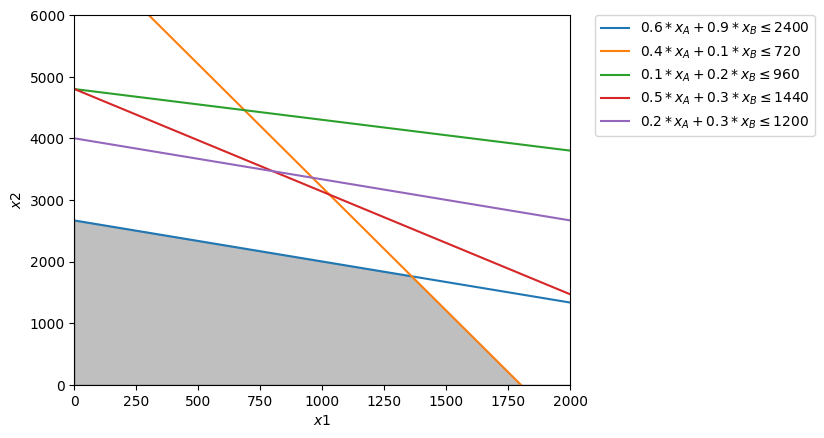

In [ ]:
# Graphical representation of the problem
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 2000, 100)

# Constraints
x2_1 = - (0.6*x1 -2400) / 0.9
x2_2 = - (0.4*x1 -720) / 0.1
x2_3 = - (0.1*x1 -960) / 0.2
x2_4 = - (0.5*x1 -1440) / 0.3
x2_5 = - (0.2*x1 -1200) / 0.3

# Show the constraints
plt.plot(x1, x2_1, label=r'$0.6*x_A + 0.9*x_B \leq 2400$')
plt.plot(x1, x2_2, label=r'$0.4*x_A + 0.1*x_B \leq 720$')
plt.plot(x1, x2_3, label=r'$0.1*x_A + 0.2*x_B \leq 960$')
plt.plot(x1, x2_4, label=r'$0.5*x_A + 0.3*x_B \leq 1440$')
plt.plot(x1, x2_5, label=r'$0.2*x_A + 0.3*x_B \leq 1200$')

plt.xlim((0, 2000))
plt.ylim((0, 6000))
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

x2_6 = np.minimum(x2_1, x2_2)
plt.fill_between(x1, x2_6, color='grey', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [ ]:
# Resolution using Pyomo
from pyomo.environ import AbstractModel, NonNegativeIntegers, Set, Var, Objective, Constraint, maximize
from pyomo.opt import SolverFactory, SolverManagerFactory
import os

# Define the problem
model = AbstractModel()
model.I = Set(initialize = [1, 2])
model.x = Var(model.I, within= NonNegativeIntegers)

# Define the objective function
def objective_function(model):
    return model.x[1] + model.x[2]
model.cost = Objective(rule = objective_function, sense = maximize)

# Define constraints
def constraint_1(model):
    return 0.6*model.x[1] + 0.9*model.x[2] <= 2400
model.c1 = Constraint(rule = constraint_1)

def constraint_2(model):
    return 0.4*model.x[1] + 0.1*model.x[2] <= 720
model.c2 = Constraint(rule = constraint_2)

def constraint_3(model):
    return 0.1*model.x[1] + 0.2*model.x[2] <= 960
model.c3 = Constraint(rule = constraint_3)

def constraint_4(model):
    return 0.5*model.x[1] + 0.3*model.x[2] <= 1440
model.c4 = Constraint(rule = constraint_4)

def constraint_5(model):
    return 0.2*model.x[1] + 0.3*model.x[2] <= 1200
model.c5 = Constraint(rule = constraint_5)

# Solve the problem with remote solver
instance = model.create_instance()

opt = SolverFactory("ipopt")
solver_manager = SolverManagerFactory('neos')
os.environ['NEOS_EMAIL'] = 'agarcia901@ikasle.ehu.eus'

results = solver_manager.solve(instance, opt = opt, load_solutions = False)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.12\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 1
  number of solutions displayed: 1
- Status: optimal
  Message: Ipopt 3.14.12\x3a Op

With the resolution of the problem, we obtain that the optimal production number is 1360 units of Type A and 1760 units of Type B, with a total of 3120 units produced in one month.

Another variation of the problem introduces a new constraint in which the number of Type A pieces produced must be equal to the production of Type B pieces. Thus, the problem would be expressed in the same way, adding the constraint
$$x_A - x_B = 0$$

In [ ]:
# Resolucion with the new constraint
model2 = AbstractModel()
model2.I = Set(initialize = [1, 2])
model2.x = Var(model2.I, within= NonNegativeIntegers)
model2.cost = Objective(rule = objective_function, sense = maximize)

# Previous constraints
model2.c1 = Constraint(rule = constraint_1)
model2.c2 = Constraint(rule = constraint_2)
model2.c3 = Constraint(rule = constraint_3)
model2.c4 = Constraint(rule = constraint_4)
model2.c5 = Constraint(rule = constraint_5)

# New constraint
def constraint_6(model):
    return model.x[1] - model.x[2] == 0
model2.c5 = Constraint(rule = constraint_6)

# Solve the problem with remote solver
instance = model2.create_instance()
opt = SolverFactory("ipopt")
solver_manager = SolverManagerFactory('neos')
os.environ['NEOS_EMAIL'] = 'agarcia901@ikasle.ehu.eus'

results = solver_manager.solve(instance, opt = opt, load_solutions = False)
results.write()

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.12\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 1
  number of solutions displayed: 1
- Status: optimal
  Message: Ipopt 3.14.12\x3a Op

In this new approach, the optimized result is to produce 1440 units of type A and B parts with a total production of 2880 units.